## Определение несущей способности висячих забивных свай
Несущую способность Fd, кН, следует определять как сумму расчетных сопротивлений грунтов основания под нижним концом сваи и на ее боковой поверхности по формуле:
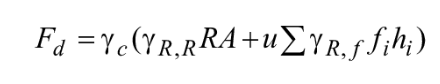
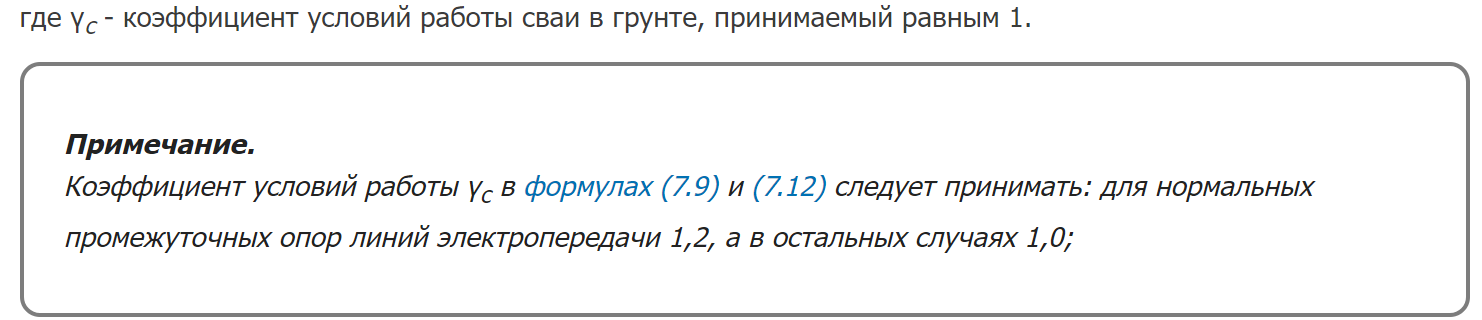
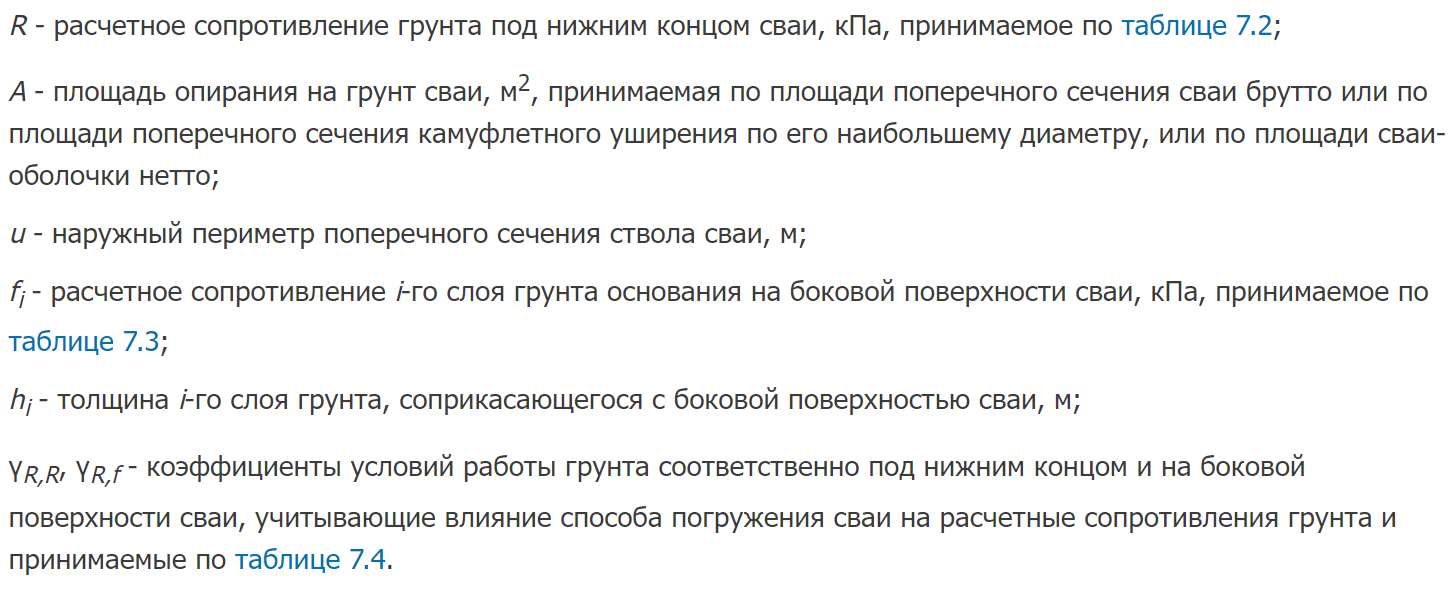

In [29]:
import pandas as pd
from layer_summation_method.CreateModels import *

In [30]:
class PileBearingCapacity:
    
    def __init__(self, **kwargs):
        self.gamma_c = kwargs.get("gamma_c")
        self.A = kwargs.get("A")
        self.P = kwargs.get("P")
        self.gamma_rr = kwargs.get("gamma_rr")
        self.z_borehole = kwargs.get("z_borehole")
        
        # Для R
        self.soil_heel = kwargs.get("soil_heel")
        self.type_soil_heel = kwargs.get("type_soil_heel")
        self.Il = kwargs.get("Il")  # показатель текучести
        self.z_heel = kwargs.get("z_heel")
        
        # Для вычисления сопротивления на боковой поверхности
        self.z_list = kwargs.get("z_list")
        self.gamma_rf = kwargs.get("gamma_rf")
        self.immersion_method = kwargs.get("immersion_method")
        self.soil_list = kwargs.get("soil_list")

        self.__read_table()

    def __read_table(self, path=""):
        self.df_f = pd.read_excel(path + "f_table.xlsx", index_col="index")
        self.df_R = pd.read_excel(path + "R_table.xlsx")
        self.df_gamma = pd.read_excel(path + "gamma_table.xlsx", usecols="C:F")
    
    def get_R(self):
        self.soil_heel
        self.type_soil_heel
        self.Il
        self.z_heel
        
    def sum_lateral(self):
        def get_f(**kwargs):
            soil = kwargs.get("soil")
            type_soil = kwargs.get("type_soil")
            Il = kwargs.get("Il")
            z_soil = kwargs.get("z")

    def get_result(self):
        F_hell = self.gamma_c * self.gamma_rr * self.get_R() * self.A
        F_lateral = self.gamma_c * self.P * self.sum_lateral()
        Fd = F_hell + F_lateral
        
model = PileBearingCapacity(gamma_c=1)

In [31]:
counts_ige = 3
dict_ige = {}
dict_soil = {}

for i in range(counts_ige):
    dict_ige[f"ige{i+1}"] = 0
    dict_soil[f"soil{i}"] = f"ige{i+1}"

z_soils = [50,
           40,
           30,
           0
           ]


Borehole = CreateBorehole(0, 0)

"""
Создание материалов
"""
for i, ige in enumerate(dict_ige):
    dict_ige[ige] = CreateMaterial()
    dict_ige[ige].change = ("gamma_c", 1)

"""
Создание слоев в скважине
"""
for i, soil in enumerate(dict_soil):
    Borehole.createSoil(bot=z_soils[i + 1],
                          material=dict_ige[dict_soil[soil]]
                          )
Borehole.change[0][0].change["Top"] = z_soils[0]
Borehole.change[0][0].change["h_soil"] = z_soils[0] - z_soils[1]

Pile = CreatePile(type = 1,
                  profile="circle",
                  d = 2,
                  length = 10,
                  z_head = 40
                  )

In [95]:
print(Pile)

{'type' = 1
'profile' = circle
'd' = 2
'length' = 10
'z_head' = 40}


In [107]:
z_heel = Pile.data["z_head"] - Pile.data["length"]
R_sum = 0

for num, soil in Borehole.data.items():
    z_pile = Pile.data["z_head"]
    soil_top = soil[0].data["Top"]
    soil_bot = soil[0].data["Bot"]
    
    if z_pile >= soil_top:
        z_top = soil_top
    
        if z_heel > soil_bot:
            z_bot = z_heel
        else:
            z_bot = soil_bot
        
        R_sum += (z_top - z_bot)
        print(z_top, z_bot)
        print(R_sum)
    
    
    

40 30
10
30 30
10


In [108]:
df_f = pd.read_excel("layer_summation_method\\data\\f_table.xlsx")

In [114]:
df_f.loc[:, df_f.columns[1: 10]]
columns

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
0,35,23,15,12,8,4,4,3,2
1,42,30,21,17,12,7,5,4,4
2,48,35,25,20,14,8,7,6,5
3,53,38,27,22,16,9,8,7,5
4,56,40,29,24,17,10,8,7,6
5,58,42,31,25,18,10,8,7,6
6,62,44,33,26,19,10,8,7,6
7,65,46,34,27,19,10,8,7,6
8,72,51,38,28,20,11,8,7,6
9,79,56,41,30,20,12,8,7,6


In [120]:
df_R = pd.read_excel("layer_summation_method\data\R_table.xlsx")

In [121]:
df_R

,h,0,0.1,0.2,0.3,0.4,0.5,0.6,sand,clay
0,3,7500,6600,3000,3100,2000,1100,600,1,0
1,3,7500,4000,3000,2000,1200,1100,600,0,1
2,4,8300,6800,3800,3200,2100,1250,700,1,0
3,4,8300,5100,3800,2500,1600,1250,700,0,1
4,5,8800,7000,4000,3400,2200,1300,800,1,0
5,5,8800,6200,4000,2800,2000,1300,800,0,1
6,7,9700,7300,4300,3700,2400,1400,850,1,0
7,7,9700,6900,4300,3300,2200,1400,850,0,1
8,10,10500,7700,5000,4000,2600,1500,900,1,0
9,10,10500,7300,5000,3500,2400,1500,900,0,1


In [126]:
df_gamma = pd.read_excel("layer_summation_method\data\gamma_table.xlsx", usecols="C:F")

In [137]:
method, option = 3, 1

df_gamma = df_gamma.applymap(lambda x: float(x.replace(",", ".")), na_action='ignore')

df_gamma.query(f"method == @method and option == @option")["gamma_rr"]

TypeError: applymap() got an unexpected keyword argument 'na_action'

In [78]:
def interpolation(df, value_i, value_j, rows=None, columns=None):
        """
        Интерполяция по строке и столбцу
        """
        def detected_index(lst, value):
            """
            Определение левого и правого индекса для интерполяции
            :param lst: Список значений
            :param value: Значение
            :return: (i_l, i_r) - соседние индексы value в lst
            """
            lst = list(lst)
            
            if value in lst:
                return lst.index(value), lst.index(value)

            i_l, i_r = None, None
            
            for i in range(len(lst)):
                if value > lst[i]:
                    i_l = i
                else:
                    i_r = i
                    break

            return i_l, i_r


        if rows is None:
            rows = list(df.index)

        if columns is None:
            columns = df.columns

        """
        Получить индексы соседей
        """
        ind_i1, ind_i2 = detected_index(rows, value_i)
        ind_j1, ind_j2 = detected_index(columns, value_j)

        """
        Получить значения соседей по индексам
        """
        if ind_i1 is None:
            i1, i2 = value_i, rows[ind_i2]
        elif ind_i2 is None:
            i1, i2 = rows[ind_i1], value_i
        else:
            i1, i2 = rows[ind_i1], rows[ind_i2]

        if ind_j1 is None:
            j1, j2 = value_j, columns[ind_j2]
        elif ind_j2 is None:
            j1, j2 = columns[ind_j1], value_j
        else:
            j1, j2 = columns[ind_j1], columns[ind_j2]

        """
        Интерполяция
        """
        matrix = df.to_numpy()

        if i1 == i2:
            row_new = matrix[ind_i2, :]
        else:
            row1 = matrix[ind_i1, :]
            row2 = matrix[ind_i2, :]
            row_new = (row2 - row1)/(i2 - i1) * (value_i - i1) + row1
        
        print(rows[ind_i1], rows[ind_i2])
        
        if j1 == j2:
            result = row_new[ind_j2]
        else:
            result = (row_new[ind_j2] - row_new[ind_j1])/(j2 - j1) * (value_j - j1) + row_new[ind_j1]

        return result
    
    
# example

df = df_R.query(f"{soil_kind} == 1")
display(df)

interpolation(df.loc[:, df.columns[1:8]], 
              4.5, 0.7, 
              list(df["h"]),
              list(map(float, df.columns[1:8]))
             )


,h,0,0.1,0.2,0.3,0.4,0.5,0.6,sand,clay
0,3,7500,6600,3000,3100,2000,1100,600,1,0
2,4,8300,6800,3800,3200,2100,1250,700,1,0
4,5,8800,7000,4000,3400,2200,1300,800,1,0
6,7,9700,7300,4300,3700,2400,1400,850,1,0
8,10,10500,7700,5000,4000,2600,1500,900,1,0
10,15,11700,8200,5600,4400,2900,1650,1000,1,0
12,20,12600,8500,6200,4800,3200,1800,1100,1,0
14,25,13400,9000,6800,5200,3500,1950,1200,1,1
15,30,14200,9500,7400,5600,3800,2100,1300,1,1
16,35,15000,10000,8000,6000,4100,2250,1400,1,1


4 5


array([[8550., 6900., 3900., 3300., 2150., 1275.,  750.]])